In [8]:
import matplotlib.pyplot as plt
import glob

from mpl_toolkits.axes_grid1 import make_axes_locatable
from scipy.stats import sigmaclip
from astropy.io import fits

In [6]:
imageDir = '/home/adriansh/Pictures/work/lsst/startracker/fitsFiles'
globstring = f'{imageDir}/*102*.fits'
files = sorted(glob.glob(globstring))
print(files)

['/home/adriansh/Pictures/work/lsst/startracker/fitsFiles/GC102_O_20221122_000042.fits', '/home/adriansh/Pictures/work/lsst/startracker/fitsFiles/GC102_O_20221122_000043.fits', '/home/adriansh/Pictures/work/lsst/startracker/fitsFiles/GC102_O_20221122_000062.fits', '/home/adriansh/Pictures/work/lsst/startracker/fitsFiles/GC102_O_20221122_000063.fits', '/home/adriansh/Pictures/work/lsst/startracker/fitsFiles/GC102_O_20221122_000066.fits', '/home/adriansh/Pictures/work/lsst/startracker/fitsFiles/GC102_O_20221122_000067.fits', '/home/adriansh/Pictures/work/lsst/startracker/fitsFiles/GC102_O_20221122_000068.fits', '/home/adriansh/Pictures/work/lsst/startracker/fitsFiles/GC102_O_20221122_000069.fits', '/home/adriansh/Pictures/work/lsst/startracker/fitsFiles/GC102_O_20221122_000070.fits', '/home/adriansh/Pictures/work/lsst/startracker/fitsFiles/GC102_O_20221122_000078.fits', '/home/adriansh/Pictures/work/lsst/startracker/fitsFiles/GC102_O_20221122_000079.fits', '/home/adriansh/Pictures/work/l

/home/adriansh/Pictures/work/lsst/startracker/fitsFiles/GC102_O_20221122_000043.fits


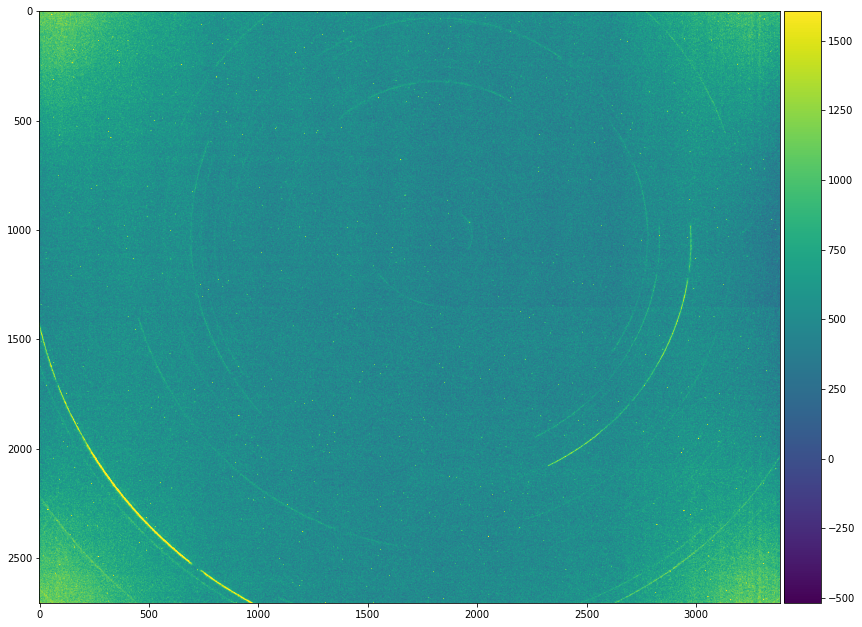

In [30]:
imNum = 1
print(files[imNum])

fig, ax = plt.subplots(figsize=(14, 14))

with fits.open(files[imNum]) as hdu:
    imArr = hdu[1].data
    imArrClip, low, high = sigmaclip(imArr)
    mean = imArrClip.mean()
    std = imArrClip.std()
    im = ax.imshow(imArr, vmin=mean-3*std, vmax=mean+3*std)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')